In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
btc_day = pd.read_csv(r"C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_day.csv")
btc_day.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
0  2020-04-10  BTCUSD  7315.25  7315.25  7315.25  7315.25        0.00   
1  2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2  2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3  2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4  2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   

    Volume USD  
0         0.00  
1  16310014.53  
2  18138080.27  
3  17047120.32  
4  26533750.17

In [3]:
btc_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1647 non-null   object 
 1   Symbol      1647 non-null   object 
 2   Open        1647 non-null   float64
 3   High        1647 non-null   float64
 4   Low         1647 non-null   float64
 5   Close       1647 non-null   float64
 6   Volume BTC  1647 non-null   float64
 7   Volume USD  1647 non-null   float64
dtypes: float64(6), object(2)
memory usage: 103.1+ KB


In [4]:
btc_day['Date'] = pd.to_datetime(btc_day['Date'])

In [5]:
btc_day.isnull().sum()

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume BTC    0
Volume USD    0
dtype: int64

<AxesSubplot:>

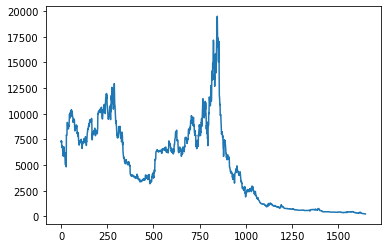

In [6]:
btc_day['Open'].plot()

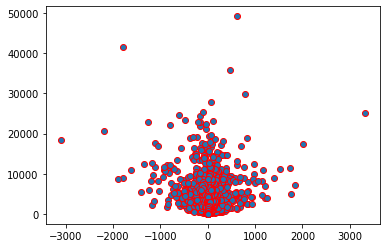

In [7]:
x1 = btc_day['Close']- btc_day['Open']
y1 = btc_day['Volume BTC']
plt.scatter(x1, y1, edgecolors='r')

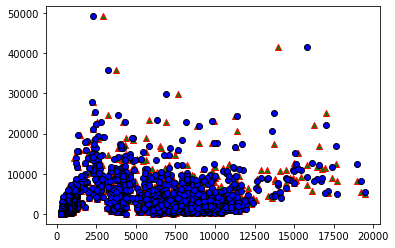

In [8]:
x1 = btc_day['Close']
x2 = btc_day['Open']
y1 = btc_day['Volume BTC']
plt.scatter(x1, y1, marker='^', c = 'g', edgecolors='r')
plt.scatter(x2, y1, marker='o', c = 'b', edgecolors='black')
plt.show()

In [9]:
print(btc_day['Date'].max()-btc_day['Date'].min())

1646 days 00:00:00


In [10]:
'''df_long = pd.melt(btc_day, id_vars=['Date'], value_vars=['Open','Close'])

fig = plt.plot(df_long, x='Date', y='value', color='variable',title='Bitcoin')
 
fig.show()'''

"df_long = pd.melt(btc_day, id_vars=['Date'], value_vars=['Open','Close'])\n\nfig = plt.plot(df_long, x='Date', y='value', color='variable',title='Bitcoin')\n \nfig.show()"

In [11]:
btc_mon = btc_day.groupby("Date")[["Open", "Close"]].sum().reset_index()

In [12]:
btc_mon

Date     Open    Close
0    2015-10-08   242.50   243.95
1    2015-10-09   243.95   245.39
2    2015-10-10   245.39   246.30
3    2015-10-11   246.30   249.50
4    2015-10-12   249.50   247.60
...         ...      ...      ...
1642 2020-04-06  6775.21  7336.96
1643 2020-04-07  7336.96  7201.81
1644 2020-04-08  7201.81  7369.60
1645 2020-04-09  7369.60  7315.25
1646 2020-04-10  7315.25  7315.25

[1647 rows x 3 columns]

In [13]:
fig = px.line(btc_mon,x='Date',y=btc_mon.columns[1:3],)
fig.update_layout(
    title = "Bitcoin_Day",
    xaxis_title = "Time Period",
    yaxis_title = "Open/Close",
    legend_title = "Prices",
    font = dict(size=14)
)
fig.layout.template = 'presentation'
fig.show()

In [14]:
pd.options.mode.chained_assignment = None       
data_of_19 = btc_day.loc[btc_day.Date.dt.year==2019]          
data_of_20 = btc_day.loc[btc_day.Date.dt.year==2020]           
data_of_20['Month'] = data_of_20['Date'].dt.month                   
data_of_19['Month'] = data_of_19['Date'].dt.month  

data20= data_of_20.groupby('Month')[["Open","Close"]].sum() 
data19= data_of_19.groupby('Month')[["Open","Close"]].sum() 

data20.index = pd.to_datetime( data20.index , format = '%m').strftime( '%B' )
data19.index = pd.to_datetime( data19.index , format = '%m').strftime( '%B' )

In [15]:
fig = px.line(data20,x=data20.index,y=data20.columns[0:3],)
fig.update_layout(
    title = " title dedo.. for the months in 2020",
    xaxis_title = "Months",
    yaxis_title = "Price", 
    font = dict(size = 12)
)
fig.update_traces(mode='markers+lines')
fig.layout.template = 'presentation'
fig.show()

fig=px.line(data19,x=data19.index,y=data19.columns[0:3],)
fig.update_layout(
    title=" title dedo.. for the months Deaths in 2019",
    xaxis_title = "Months",
    yaxis_title = "Price",
    font = dict(size=12)
)
fig.update_traces(mode='markers+lines')
fig.layout.template = 'presentation'
fig.show()

In [16]:
btc_day["Date"].min()

Timestamp('2015-10-08 00:00:00')

In [17]:
pd.options.mode.chained_assignment = None                
data_of_15 = btc_day.loc[btc_day.Date.dt.year == 2015]           
data_of_15['Month'] = data_of_15['Date'].dt.month                    

data15 = data_of_15.groupby('Month')[["Open","Close"]].sum() 

data15.index = pd.to_datetime( data15.index , format = '%m').strftime( '%B' )

fig=px.line(data15,x=data15.index,y=data15.columns[0:3],)
fig.update_layout(
    title=" title dedo.. for the months Deaths in 2015",
    xaxis_title = "Months",
    yaxis_title = "Price",
    font = dict(size=12)
)
fig.update_traces(mode='markers+lines')
fig.layout.template = 'presentation'
fig.show()

# CORRELATION

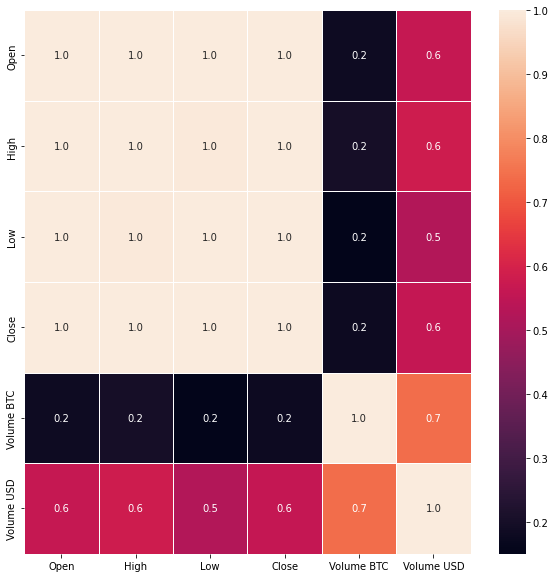

In [18]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(btc_day.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

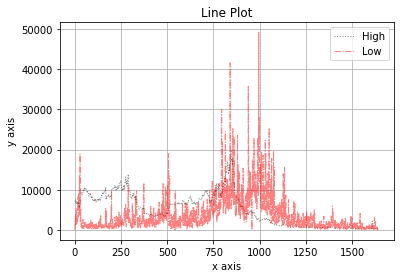

In [31]:
btc_day["High"].plot(kind = 'line', color = 'k',label = 'High',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
btc_day['Volume BTC'].plot(color = 'r',label = 'Low',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')

plt.legend(loc='upper right')     
plt.xlabel('x axis')            
plt.ylabel('y axis')
plt.title('Line Plot')           
plt.show()

In [20]:
btc_day['High-Low'] = btc_day['High'] - btc_day['Low']
btc_day['Close-Open'] = btc_day['Close'] - btc_day['Open']

In [21]:
btc_day

Date  Symbol     Open     High      Low    Close  Volume BTC  \
0    2020-04-10  BTCUSD  7315.25  7315.25  7315.25  7315.25        0.00   
1    2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2    2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3    2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4    2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
...         ...     ...      ...      ...      ...      ...         ...   
1642 2015-10-12  BTCUSD   249.50   249.50   247.60   247.60       38.28   
1643 2015-10-11  BTCUSD   246.30   249.50   246.30   249.50       12.22   
1644 2015-10-10  BTCUSD   245.39   246.30   244.60   246.30       12.17   
1645 2015-10-09  BTCUSD   243.95   249.97   243.60   245.39       30.99   
1646 2015-10-08  BTCUSD   242.50   245.00   242.50   243.95       18.80   

       Volume USD  High-Low  Close-Open  
0            0.00      0.00        0.00  
1     16310014.53    263.81      -54.35  
2     18138080.27    279.43      167.79  
3     17047120.32    390.42     -135.15  
4     26533750.17    598.75      561.75  
...           ...       ...         ...  
1642      9493.89      1.90       -1.90  
1643      3021.12      3.20        3.20  
1644      2984.44      1.70        0.91  
1645      7651.63      6.37        1.44  
1646      4595.84      2.50        1.45  

[1647 rows x 10 columns]

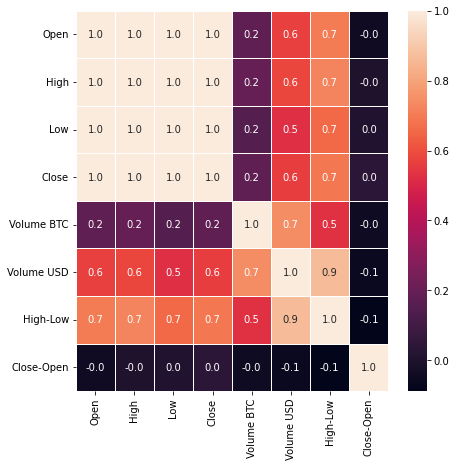

In [22]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(btc_day.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [23]:
btc_min = pd.read_csv(r'C:\Users\Sahil\Desktop\IITP\VScode\Bitcoin\BTCUSD_1min.csv')
btc_min.head()

Unix Timestamp                 Date  Symbol     Open     High      Low  \
0   1586390400000  2020-04-09 00:00:00  BTCUSD  7369.60  7369.60  7348.47   
1   1586390340000  2020-04-08 23:59:00  BTCUSD  7364.37  7369.60  7364.37   
2   1586390280000  2020-04-08 23:58:00  BTCUSD  7360.89  7367.18  7360.89   
3   1586390220000  2020-04-08 23:57:00  BTCUSD  7357.62  7366.12  7357.62   
4   1586390160000  2020-04-08 23:56:00  BTCUSD  7370.71  7370.71  7357.62   

     Close    Volume  
0  7350.41  7.733528  
1  7369.60  1.310954  
2  7364.37  1.018774  
3  7360.89  0.026251  
4  7357.62  0.444867

In [24]:
btc_min['High+Low+Close'] = btc_min['High'] + btc_min['Low'] + btc_min['Close']
btc_min['Average'] = btc_min['High+Low+Close']/3
btc_min.head()

Unix Timestamp                 Date  Symbol     Open     High      Low  \
0   1586390400000  2020-04-09 00:00:00  BTCUSD  7369.60  7369.60  7348.47   
1   1586390340000  2020-04-08 23:59:00  BTCUSD  7364.37  7369.60  7364.37   
2   1586390280000  2020-04-08 23:58:00  BTCUSD  7360.89  7367.18  7360.89   
3   1586390220000  2020-04-08 23:57:00  BTCUSD  7357.62  7366.12  7357.62   
4   1586390160000  2020-04-08 23:56:00  BTCUSD  7370.71  7370.71  7357.62   

     Close    Volume  High+Low+Close      Average  
0  7350.41  7.733528        22068.48  7356.160000  
1  7369.60  1.310954        22103.57  7367.856667  
2  7364.37  1.018774        22092.44  7364.146667  
3  7360.89  0.026251        22084.63  7361.543333  
4  7357.62  0.444867        22085.95  7361.983333

In [25]:
btc_min['Volume'].sum()

6013291.017257081

In [29]:
btc_day_copy = btc_day.copy()
btc_day_copy.drop(btc_day_copy[btc_day_copy['Volume BTC'] == 0].index, inplace = True)
btc_day_copy.head()

Date  Symbol     Open     High      Low    Close  Volume BTC  \
1 2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
2 2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
3 2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
4 2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
5 2020-04-05  BTCUSD  6870.20  6907.90  6678.60  6775.21     1275.49   

    Volume USD  High-Low  Close-Open  
1  16310014.53    263.81      -54.35  
2  18138080.27    279.43      167.79  
3  17047120.32    390.42     -135.15  
4  26533750.17    598.75      561.75  
5   8662210.80    229.30      -94.99

In [30]:
print(btc_day.shape,btc_day_copy.shape)

(1647, 10) (1643, 10)
